<a href="https://colab.research.google.com/github/AnaCristina1972/aranoua/blob/main/Aula30092023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import cv2
import numpy as np
import matplotlib as plt
from PIL import Image
from pylab import *
%matplotlib inline


In [24]:
def plot_imagens_2(img1, tit1, img2, tit2, res):
    figure(figsize = res)
    plt.subplot(1,2,1), plt.imshow(img1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2), plt.imshow(img2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.show()

def plot_imagens_3(img1, tit1, img2, tit2, img3, tit3,res):
    figure(figsize = res)
    plt.subplot(1,3,1), plt.imshow(img1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2), plt.imshow(img2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3), plt.imshow(img3), plt.title(tit3)
    plt.xticks([]), plt.yticks([])
    plt.show()


In [33]:
imagem=cv2.imread("/content/familia_semluz.tif")

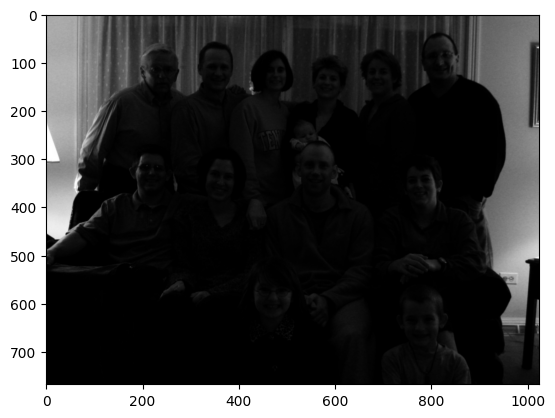

In [34]:
imshow(imagem)

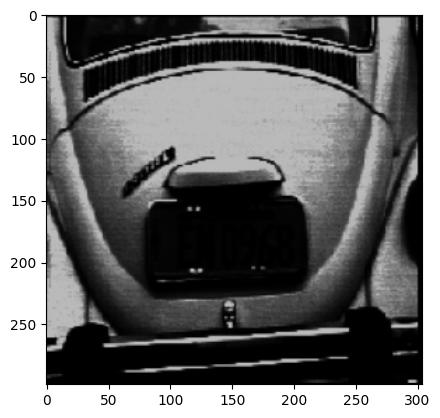

In [30]:
im_f = cv2.imread("/content/fusca_placa.jpg")

imshow(im_f)



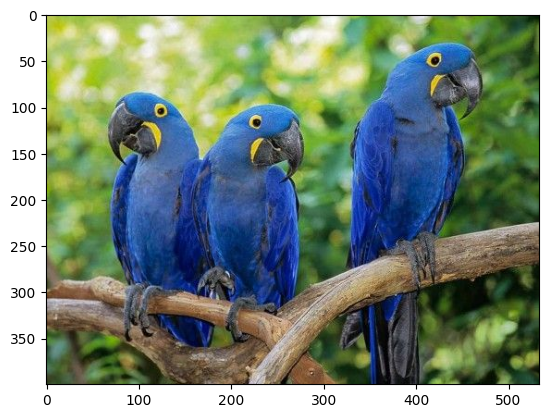

In [29]:
img_a = cv2.imread("/content/arara_azul2.jpg")

img_rgb = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)

imshow(img_rgb)

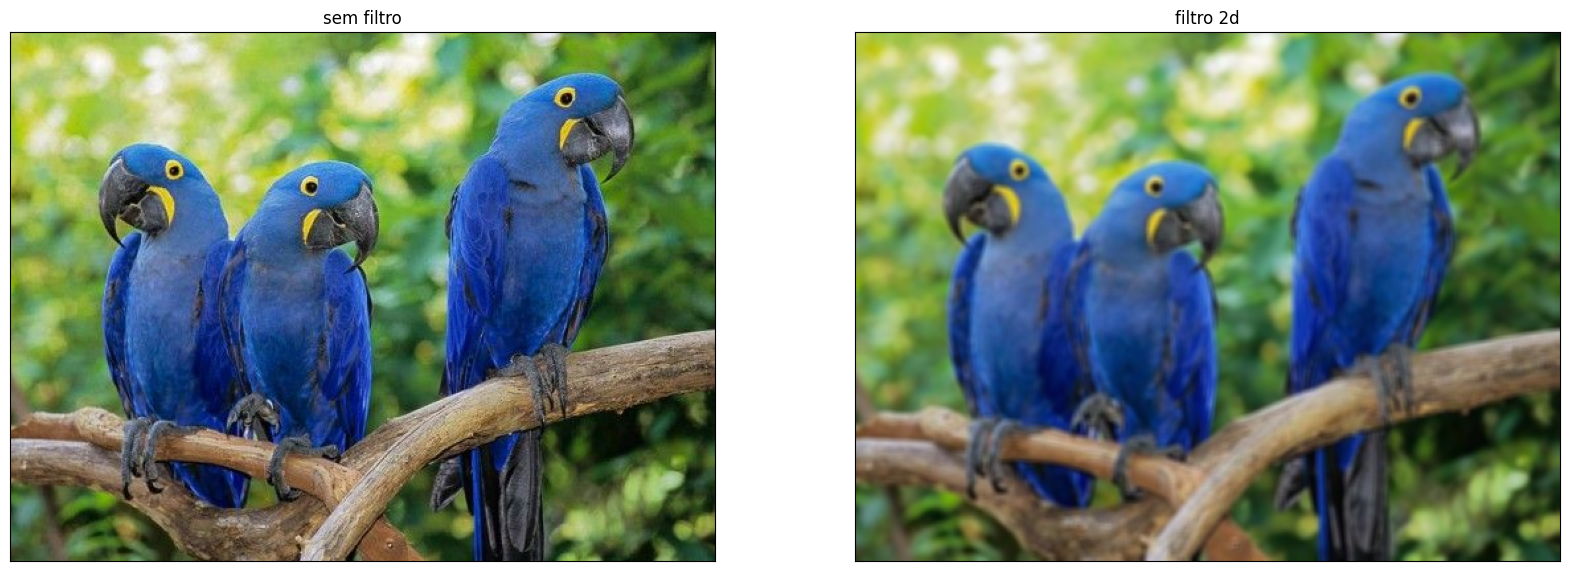

In [35]:
k1 = np.ones((5,5), np.float32) / 25
img_filtro2d = cv2.filter2D(img_rgb, -1, k1)
plot_imagens_2(img_rgb, 'sem filtro', img_filtro2d, 'filtro 2d', (20,20))

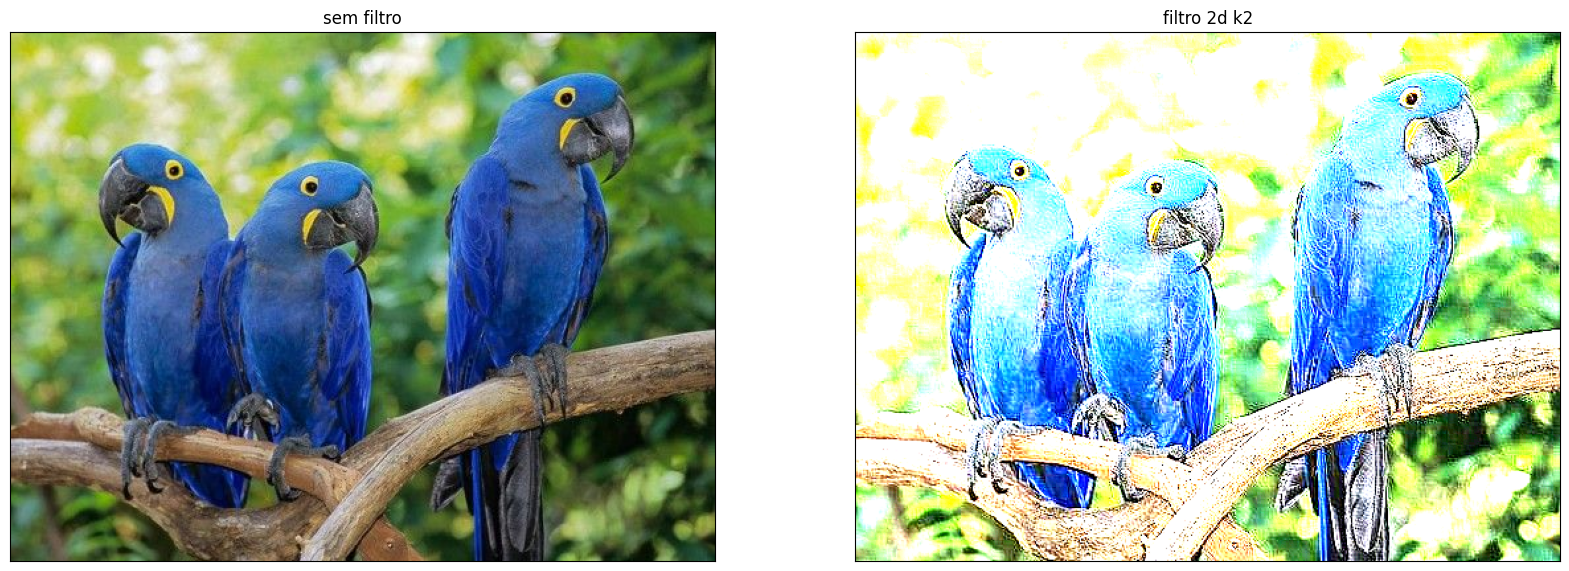

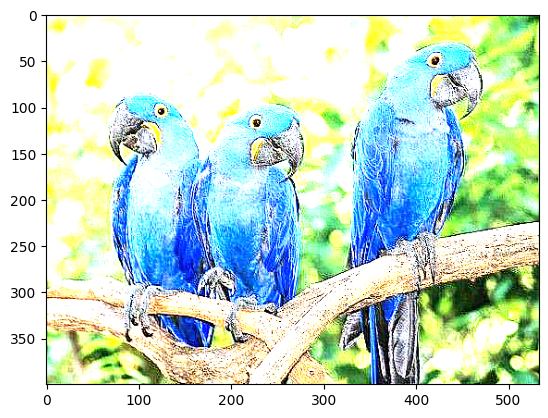

In [36]:
k2 = np.array([[1,-1,-1],
               [-1,9,-1],
               [-1,-1,-1]])
img_filtro2d_k2 = cv2.filter2D(img_rgb, -1, k2)
plot_imagens_2(img_rgb, 'sem filtro', img_filtro2d_k2, 'filtro 2d k2', (20,20))
imshow(img_filtro2d_k2)

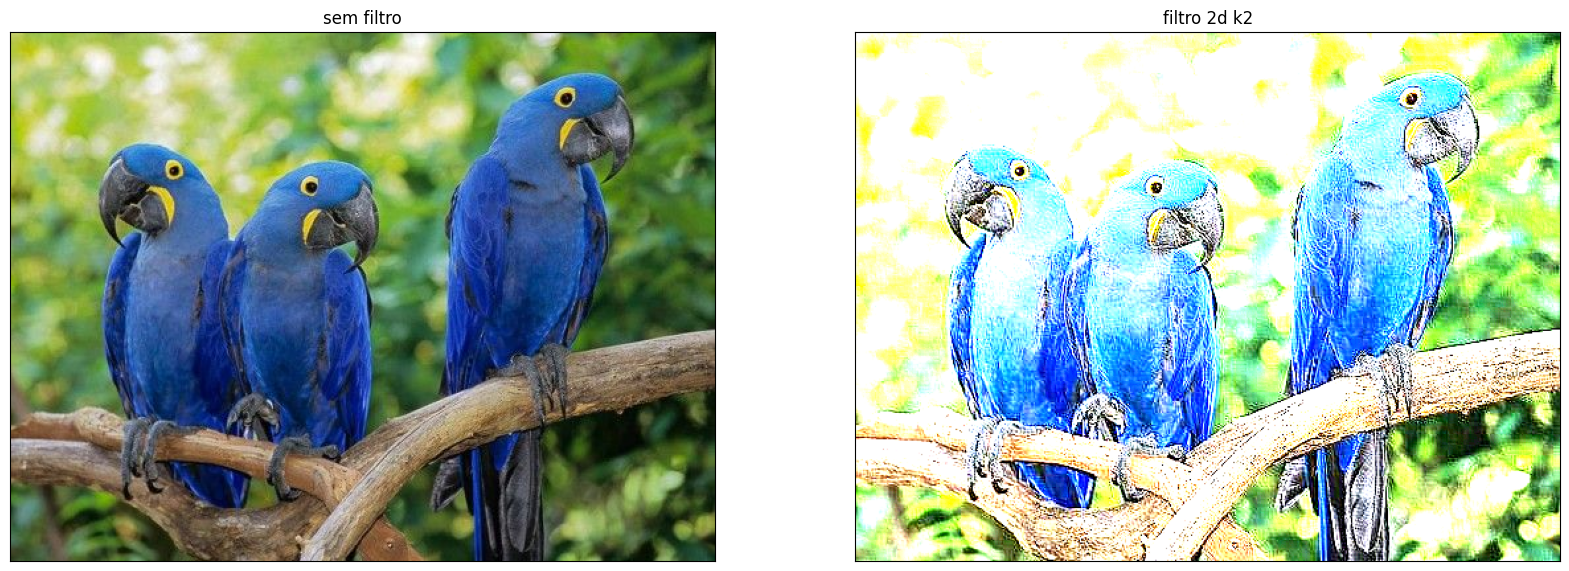

In [37]:
plot_imagens_2(img_rgb, 'sem filtro', img_filtro2d_k2, 'filtro 2d k2', (20,20))
k3 = np.array([[0,-1,0],
               [-1,5,-1],
               [0,-1,0]])
img_filtro2d_k3 = cv2.filter2D(img_rgb, -1, k3)

#Regressão linear

In [41]:
!pip install scikit-learn seaborn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [77]:
path="/content/ConsumoxCo2.csv"
df_co2=pd.read_csv(path)

In [69]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [70]:
df_co2.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [71]:
df_co2.groupby

<bound method DataFrame.groupby of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPT

In [72]:
df_co2.groupby('MAKE').count()

MODELYEAR  MODEL  VEHICLECLASS  ENGINESIZE  CYLINDERS  \
MAKE                                                                   
ACURA                 12     12            12          12         12   
ASTON MARTIN           7      7             7           7          7   
AUDI                  49     49            49          49         49   
BENTLEY                8      8             8           8          8   
BMW                   64     64            64          64         64   
BUICK                 16     16            16          16         16   
CADILLAC              32     32            32          32         32   
CHEVROLET             86     86            86          86         86   
CHRYSLER              19     19            19          19         19   
DODGE                 39     39            39          39         39   
FIAT                  10     10            10          10         10   
FORD                  90     90            90          90         90   
GMC                   49     49            49          49         49   
HONDA                 21     21            21          21         21   
HYUNDAI               24     24            24          24         24   
INFINITI              21     21            21          21         21   
JAGUAR                22     22            22          22         22   
JEEP                  31     31            31          31         31   
KIA                   33     33            33          33         33   
LAMBORGHINI            3      3             3           3          3   
LAND ROVER            19     19            19          19         19   
LEXUS                 22     22            22          22         22   
LINCOLN               11     11            11          11         11   
MASERATI               6      6             6           6          6   
MAZDA                 27     27            27          27         27   
MERCEDES-BENZ         59     59            59          59         59   
MINI                  36     36            36          36         36   
MITSUBISHI            16     16            16          16         16   
NISSAN                33     33            33          33         33   
PORSCHE               44     44            44          44         44   
RAM                   13     13            13          13         13   
ROLLS-ROYCE            7      7             7           7          7   
SCION                  9      9             9           9          9   
SMART                  2      2             2           2          2   
SRT                    2      2             2           2          2   
SUBARU                23     23            23          23         23   
TOYOTA                49     49            49          49         49   
VOLKSWAGEN            42     42            42          42         42   
VOLVO                 11     11            11          11         11   

               TRANSMISSION  FUELTYPE  FUELCONSUMPTION_CITY  \
MAKE                                                          
ACURA                    12        12                    12   
ASTON MARTIN              7         7                     7   
AUDI                     49        49                    49   
BENTLEY                   8         8                     8   
BMW                      64        64                    64   
BUICK                    16        16                    16   
CADILLAC                 32        32                    32   
CHEVROLET                86        86                    86   
CHRYSLER                 19        19                    19   
DODGE                    39        39                    39   
FIAT                     10        10                    10   
FORD                     90        90                    90   
GMC                      49        49                    49   
HONDA                    21        21                    21   
HYUNDAI                  24        24                 

In [89]:
selecao = df_co2[['ENGINESIZE', 'CO2EMISSIONS']]

In [90]:
selecao.head()

ENGINESIZE  CO2EMISSIONS
0         2.0           196
1         2.4           221
2         1.5           136
3         3.5           255
4         3.5           244

Text(0, 0.5, 'CO2EMISSIONS')

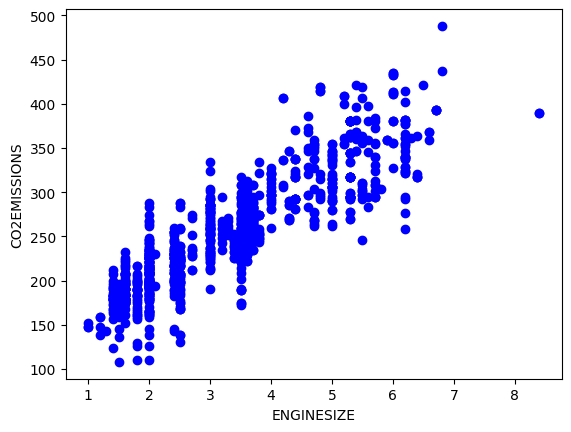

In [173]:
plt.scatter(selecao['ENGINESIZE'], selecao['CO2EMISSIONS'], color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

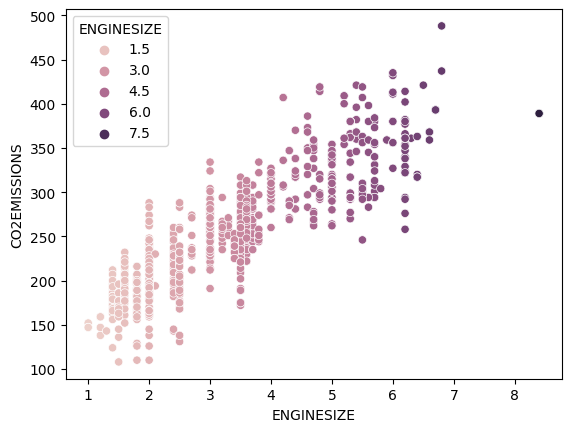

In [93]:
comp = sns.scatterplot(x='ENGINESIZE',
                      y='CO2EMISSIONS',
                      data = selecao,
                      color = 'blue',
                      hue = 'ENGINESIZE')

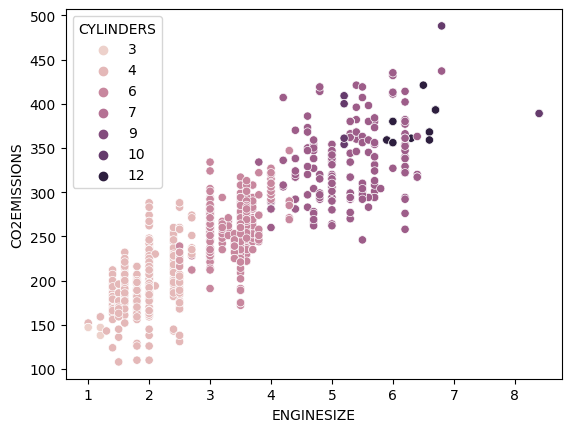

In [95]:
comp2 = sns.scatterplot(x='ENGINESIZE',
                      y='CO2EMISSIONS',
                      data = df_co2,
                      color = 'blue',
                      hue = 'CYLINDERS')

In [144]:
treino1=selecao[:((int(len(selecao)*0.8)))] # fatiando o banco, e distribuindo os dados para treino e teste
teste1=selecao[((int(len(selecao)*0.8))):]

In [145]:
treino1.shape,teste1.shape

((853, 2), (214, 2))

In [178]:
treino2=selecao[:((int(len(selecao)*0.7)))] # fatiando o banco, e distribuindo os dados para treino e teste
teste2=selecao[((int(len(selecao)*0.7))):]

In [179]:
treino1.shape,teste1.shape

((853, 2), (214, 2))

#Treino do modelo

In [175]:
path="/content/ConsumoxCo2.csv"
df_co2=pd.read_csv(path)

In [176]:
selecao = df_co2[['ENGINESIZE', 'CO2EMISSIONS']]

In [180]:
treino1=selecao[:((int(len(selecao)*0.8)))] # fatiando o banco, e distribuindo os dados para treino e teste
teste1=selecao[((int(len(selecao)*0.8))):]

In [181]:
modelo=linear_model.LinearRegression()


In [187]:
treino_x=np.array(treino1[['ENGINESIZE']])
treino_y=np.array(treino1[['CO2EMISSIONS']])

In [188]:
modelo.fit(treino_x, treino_y)

LinearRegression()

In [189]:
modelo.coef_

array([[38.79512384]])

In [190]:
modelo.intercept_

array([127.16989951])

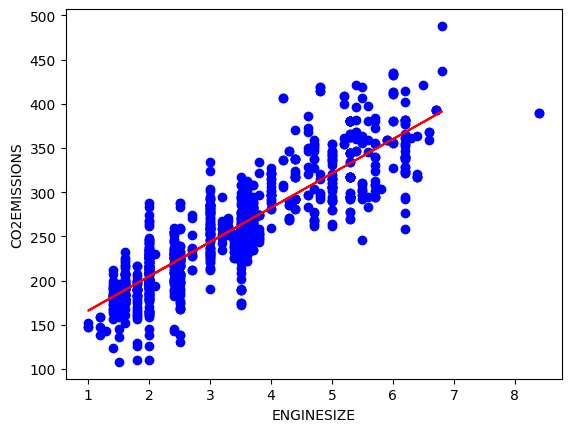

In [191]:
plt.scatter(selecao['ENGINESIZE'], selecao['CO2EMISSIONS'], color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.plot(treino_x, modelo.coef_ * treino_x + modelo.intercept_,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

#Treinamento2

In [192]:
def model_pred(dados_entrada, intercept_, slope):
    pred = dados_entrada * slope + intercept_
    return pred

modelo.intercept_

eng_size = 2.0
emissao_estimada = model_pred(eng_size,
                              modelo.intercept_[0],
                              modelo.coef_[0][0])
print('Emissao estimada pra motor',
     eng_size,
     'é: ',
     emissao_estimada)

Emissao estimada pra motor 2.0 é:  204.7601471809325


In [193]:
test_x = np.array(teste1[['ENGINESIZE']])
test_y = np.array(teste1[['CO2EMISSIONS']])
test_y = modelo.predict(test_x)

In [194]:
print('MSE (Mean Sum os Squares): %.2f'
      % np.mean((test_y) **2))

MSE (Mean Sum os Squares): 64002.35


In [196]:
from sklearn.metrics import r2_score

In [197]:
print('Score R2: %.2f'
     % r2_score(test_y, test_y))

Score R2: 1.00


In [199]:
df_co2.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [ ]:
x=df_co2[[['ENGINESIZE', 'CO2EMISSIONS']]]

#Regressão Linear com multiplas variáveis

#Classificação com naive bayes


In [200]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [201]:
from sklearn import preprocessing

In [206]:
from matplotlib.projections import ProjectionRegistry
vals=preprocessing.LabelEncoder()

In [207]:
weather_codigo = vals.fit_transform(weather)


In [208]:
weather_codigo

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [210]:
tempo = vals.fit_transform(temp)

In [211]:
tempo

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])

In [212]:
play_codigo=vals.fit_transform(play)

In [213]:
play_codigo

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [214]:
weather_codigo,tempo,play_codigo

(array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1]),
 array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]))

In [232]:
a=tuple(zip(weather_codigo,tempo))

In [233]:
a

((2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2))

In [240]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

In [241]:
modelo=GaussianNB()

In [242]:
modelo.fit(a,play_codigo)

GaussianNB()

In [243]:
predicao=modelo.predict([(1, 2)])

In [244]:
predicao

array([1])

In [248]:
from sklearn import datasets

In [249]:
wine=datasets.load_wine()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [255]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [254]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [252]:
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [253]:
print(wine.data.shape)

(178, 13)


In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test,Y_train,Y_test=train_test_split(wine.data, wine.target,test_size=0.3,random_state=1)

In [260]:
X_train.shape,Y_train.shape,Y_test.shape,X_test.shape

((124, 13), (124,), (54,), (54, 13))

In [261]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

In [ ]:
modelo=GaussianNB

In [262]:

modelo.fit(X_train,Y_train)

GaussianNB()

In [263]:
Y_predicao=modelo.predict(X_test)

In [264]:
from sklearn import metrics

In [266]:
print("Acurácia %2f" % metrics.accuracy_score(Y_test, Y_predicao) )

Acurácia 0.981481


In [267]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_arvore_decisao), display_labels=classificador_arvore_decisao.classes_[0]).plot()
plt.grid(False)
plt.show()

#EXERCICIO

In [270]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

In [271]:
from sklearn.model_selection import train_test_split

In [ ]:
database1=

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(wine.data, wine.target,test_size=0.3,random_state=1)

In [ ]:
modelo1=GaussianNB

In [ ]:
modelo1.fit(X_train,Y_train)

In [ ]:
Y_predicao=modelo1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score